# Load libraries

In [1]:
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.utils import shuffle
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import networkx as nx
import itertools
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy.stats import zscore

# Load data

In [2]:
blue=pd.read_csv('fad_blue_rnadata.csv').rename(columns={"Unnamed: 0": "Cells"})
blue.set_index("Cells", drop=True,inplace=True)
blue=blue.T
#^transpose because we want genes to be features

In [3]:
idx=blue.index
y=blue['BlueFP']
x=blue.drop(['BlueFP'],axis=1) 
genes=x.columns
#set x and y
x1=x.to_numpy()
x2=zscore(x1,axis=1)

In [4]:
# get top 100 components
pca = PCA(n_components=100)
compss = pca.fit_transform(x2)
np.save('data/X_pca.npy',compss)
compss.shape

(3306, 100)

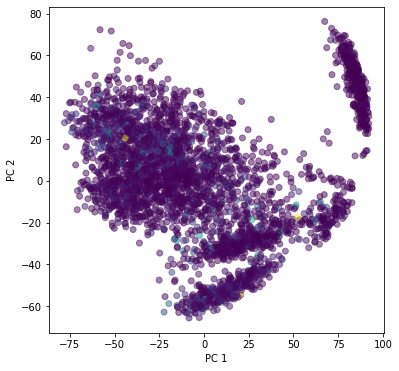

In [12]:
from matplotlib.pyplot import figure

figure(figsize=(6, 6))
plt.scatter(compss[:,0],compss[:,1],c=y,alpha=0.5)
plt.xlabel('PC 1')
plt.ylabel('PC 2')

#each point is a cell
plt.savefig('pc1and2.png')

In [6]:
compss[:,0]

array([ 76.14890104, -35.92004075, -17.36322683, ...,  56.5043879 ,
        26.68608806,  49.01135291])

In [7]:
gene_components=pd.DataFrame(data = pca.components_ , columns = genes)
gene_components.to_csv('data/princ_gene_components')

In [8]:
gene_components.loc[[0]]

Cells,Xkr4,Gm1992,Gm19938,Gm37381,Rp1,Sox17,Gm37587,Mrpl15,Lypla1,Tcea1,...,4932411N23Rik,Gm382,Tcp11x2,Eif2c5,Vsig1,Gm15128,Gm15097,Magea2,Gm28482,Gm28897
0,-0.01174,0.000079,-0.000178,0.00024,0.000261,0.000239,0.000239,0.000252,0.000445,0.000154,...,0.000239,0.000239,0.000239,0.000239,0.000239,0.000247,0.000239,0.000239,0.000239,0.000239


In [ ]:
# get top 100 components
sum(pca.explained_variance_ratio_)

In [9]:
# get top 200 components
pca = PCA(n_components=200)
compss = pca.fit_transform(x2)
np.save('data/X_pca200.npy',compss)
compss.shape

(3306, 200)

In [16]:
# get top 200 components
sum(pca.explained_variance_ratio_)

0.9326326658808395

In [17]:
# get top 200 components
pca = PCA(n_components=100)
compss = pca.fit_transform(x2)
np.save('data/X_pca200.npy',compss)
compss.shape
# get top 200 components
sum(pca.explained_variance_ratio_)

0.9035449018724834